Визуальный анализ признаков, сгенерированных скриптами features_*.py

In [1]:
# -*- coding: utf-8 -*-
# coding: utf-8

from __future__ import print_function
from __future__ import division  # for python2 compatability

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from collections import Counter
import tqdm
import re
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import functools
import sys

In [9]:
df = pd.read_csv("../data/dftrain.csv", encoding='utf-8')

In [22]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,...,quest_rnn_27,parag_rnn_27,quest_rnn_28,parag_rnn_28,quest_rnn_29,parag_rnn_29,quest_rnn_30,parag_rnn_30,quest_rnn_31,parag_rnn_31
count,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,...,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000,119398.000000
mean,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,...,0.015970,-0.047048,-0.051513,-0.008187,0.024681,-0.014385,-0.229811,-0.171923,0.039492,-0.001168
std,34467.378058,34467.378058,34467.378058,34467.378058,34467.378058,34467.378058,34467.378058,34467.378058,34467.378058,34467.378058,...,0.108612,0.164314,0.113517,0.142573,0.095035,0.112190,0.126164,0.161608,0.089942,0.189454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.359217,-0.458534,-0.490553,-0.625663,-0.363912,-0.595311,-0.735116,-0.936800,-0.284642,-0.725251
25%,29849.250000,29849.250000,29849.250000,29849.250000,29849.250000,29849.250000,29849.250000,29849.250000,29849.250000,29849.250000,...,-0.059770,-0.160241,-0.130764,-0.100844,-0.043728,-0.073109,-0.320344,-0.273295,-0.021715,-0.079554
50%,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,59698.500000,...,0.015574,-0.062900,-0.053058,-0.005251,0.019271,-0.012633,-0.223642,-0.146771,0.041348,0.017745
75%,89547.750000,89547.750000,89547.750000,89547.750000,89547.750000,89547.750000,89547.750000,89547.750000,89547.750000,89547.750000,...,0.091340,0.042192,0.028875,0.082639,0.086086,0.048407,-0.133340,-0.072488,0.102038,0.104806
max,119397.000000,119397.000000,119397.000000,119397.000000,119397.000000,119397.000000,119397.000000,119397.000000,119397.000000,119397.000000,...,0.512503,0.640305,0.399663,0.674494,0.514956,0.836360,0.165110,0.597553,0.487491,0.677169


In [50]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'paragraph_id',
       'question_id', 'paragraph', 'question', 'target', 'len_paragraph',
       'len_question', 'len_intersection', 'idf_question', 'idf_paragraph',
       'idf_intersection', 'len_paragraph2', 'len_question2',
       'len_intersection2', 'idf_question2', 'idf_paragraph2',
       'idf_intersection2', 'w2v_cos', 'nes_intersection',
       'best_sent_match', 'best_ne_match', 'max_w2v_cos', 'min_w2v_cos',
       'avg_w2v_cos', 'max_idf_intersection2_sent', 'lsa_cos',
       'quest_ne_count', 'quest_fw_count', 'fw_intersection',
       'best_fw_match', 'sum_w0', 'sum_w1', 'max_tail_match',
       'max_lsa_per_sent', 'min_lsa_per_sent', 'avg_lsa_per_sent'], dtype=object)

In [10]:
feature_names = [
'max_fuzz_qratio_str',
'max_fuzz_WRatio_str',
'max_fuzz_partial_ratio_str',
'max_fuzz_partial_token_set_ratio_str',
'max_fuzz_partial_token_sort_ratio_str',
'max_fuzz_token_set_ratio_str',
'max_fuzz_token_sort_ratio_str',
    'lsa_cos', 'w2v_cos', 'len_paragraph', 'len_question',
           'len_intersection', 'idf_question', 'idf_paragraph', 'idf_intersection',
           'len_paragraph2', 'len_question2', 'len_intersection2',
           'idf_question2', 'idf_paragraph2', 'idf_intersection2',
           'best_sent_match',
           'max_w2v_cos',
           'avg_w2v_cos',
           'max_idf_intersection2_sent',
           'quest_ne_count',
           'nes_intersection',
           'best_ne_match',
           'quest_fw_count',
           #'fw_intersection',
           #'best_fw_match',
           'sum_w0',
           'sum_w1',
           'max_tail_match',
           'max_lsa_per_sent', 'min_lsa_per_sent', 'avg_lsa_per_sent',
           'quest_oov_count', 'parag_oov_count', 'oov_intersection', # features_18_1.py
           'max_intersect3',
           'max_syn_sim',
           'rnn_cos',
           'min_wmd',
           'max_wmd',
           'avg_wmd',
           'wmd'
          ]

#feature_names.extend( ['quest_rnn_{}'.format(i) for i in range(32)] )
#feature_names.extend( ['parag_rnn_{}'.format(i) for i in range(32)] )

In [7]:
print( len(feature_names) )

45


max_fuzz_qratio_str min=0.0 max=1.0


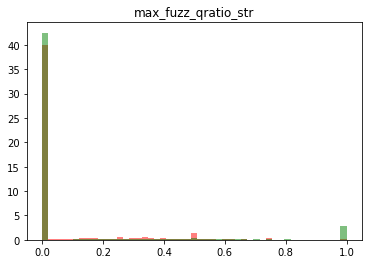

max_fuzz_WRatio_str min=0.0 max=1.0


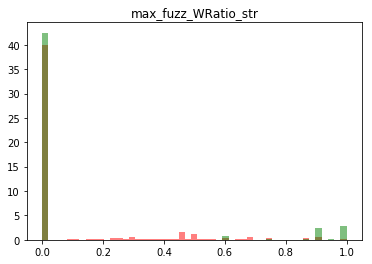

max_fuzz_partial_ratio_str min=0.29 max=1.0


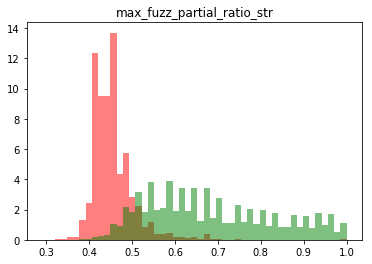

max_fuzz_partial_token_set_ratio_str min=0.0 max=1.0


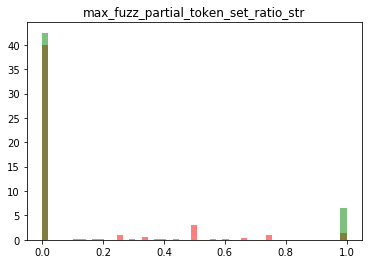

max_fuzz_partial_token_sort_ratio_str min=0.0 max=1.0


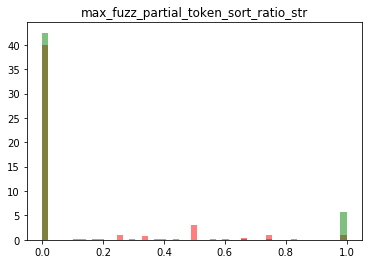

max_fuzz_token_set_ratio_str min=0.0 max=1.0


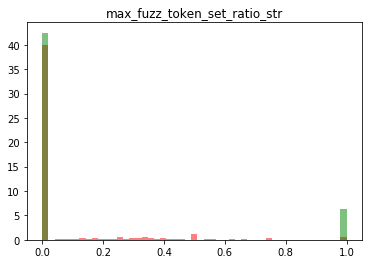

max_fuzz_token_sort_ratio_str min=0.0 max=1.0


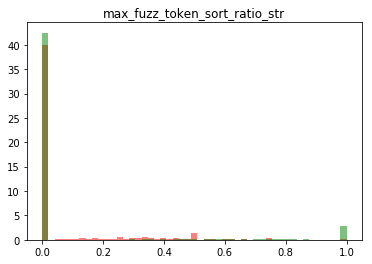

lsa_cos min=0.0 max=1.17259777586


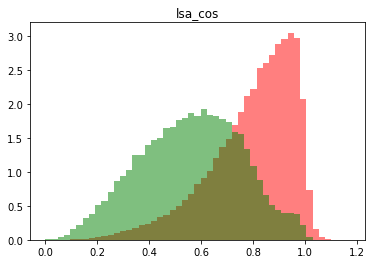

w2v_cos min=0.00121311153593 max=1.28696567844


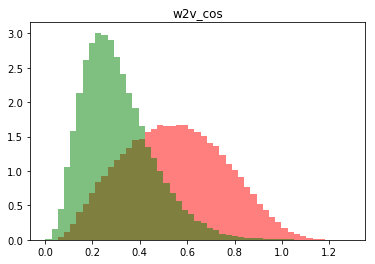

len_paragraph min=28.0 max=522.0


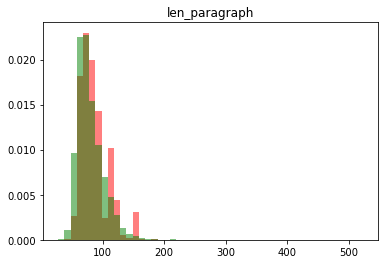

len_question min=2.0 max=58.0


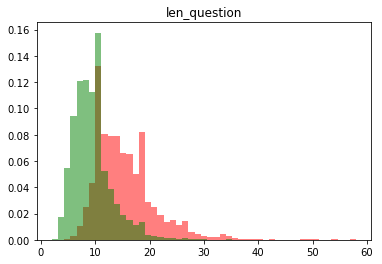

len_intersection min=1.0 max=53.0


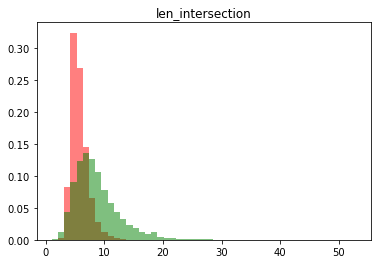

idf_question min=0.926164222838 max=192.382430111


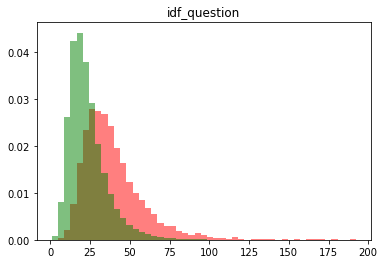

idf_paragraph min=78.6118290542 max=2307.11539942


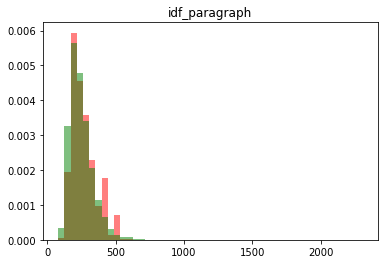

idf_intersection min=0.0 max=186.701650899


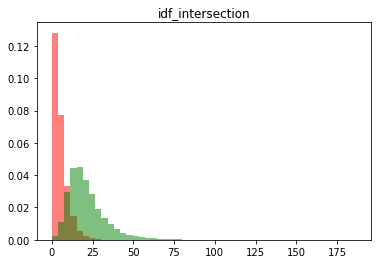

len_paragraph2 min=28.0 max=491.0


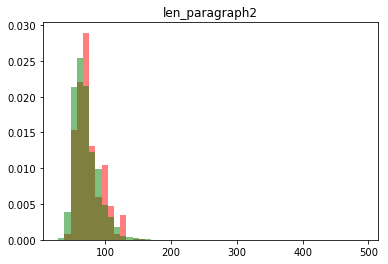

len_question2 min=2.0 max=49.0


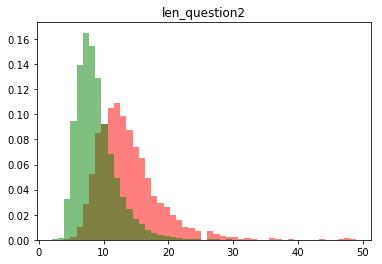

len_intersection2 min=1.0 max=48.0


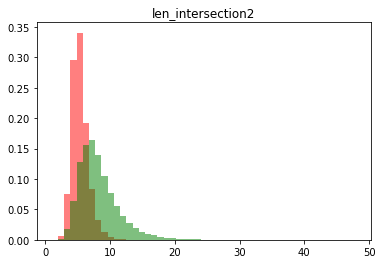

idf_question2 min=0.0380581373889 max=185.549760532


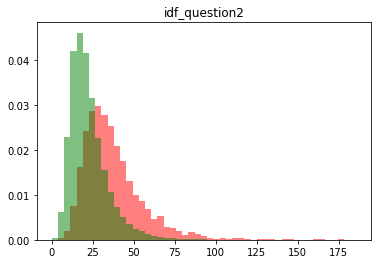

idf_paragraph2 min=71.9506141071 max=2252.87188752


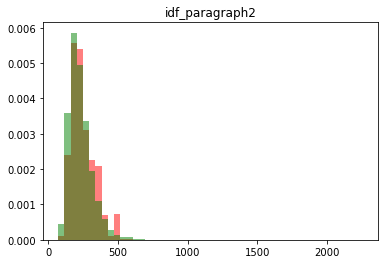

idf_intersection2 min=0.0 max=185.549760532


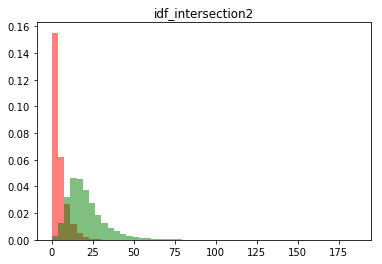

best_sent_match min=0.0689655172414 max=1.0


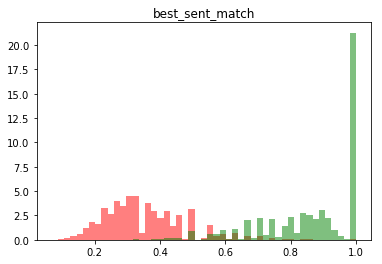

max_w2v_cos min=0.00121311153593 max=1.3636422155


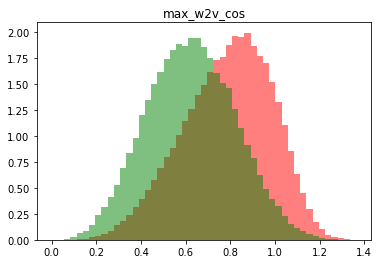

avg_w2v_cos min=0.0012131115238 max=1.24579551656


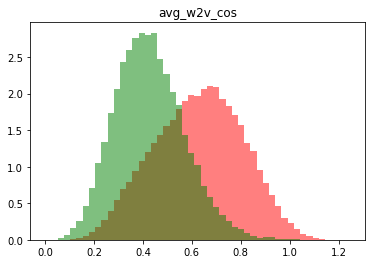

max_idf_intersection2_sent min=0.0 max=168.261517953


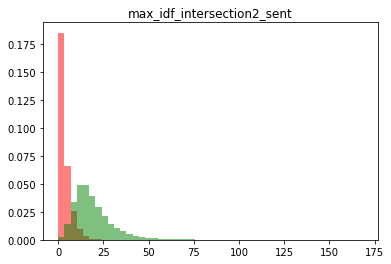

quest_ne_count min=0.0 max=27.0


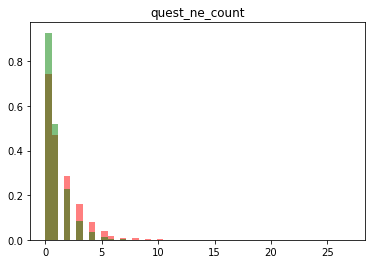

nes_intersection min=0.0 max=23.0


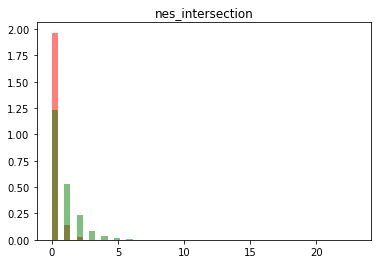

best_ne_match min=0.0 max=2.0


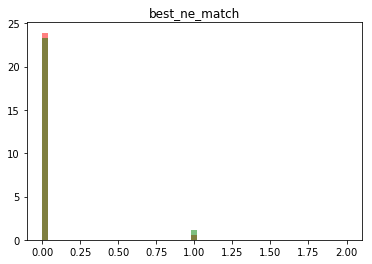

quest_fw_count min=0.0 max=18.0


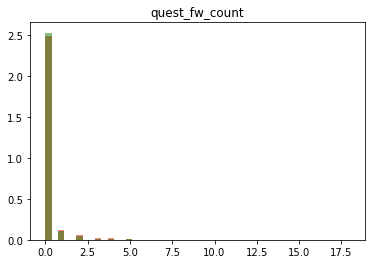

sum_w0 min=0.0 max=0.0188347393837


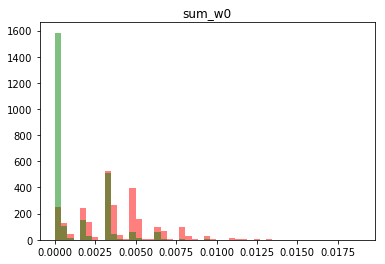

sum_w1 min=2.92881098221e-11 max=0.00843115424799


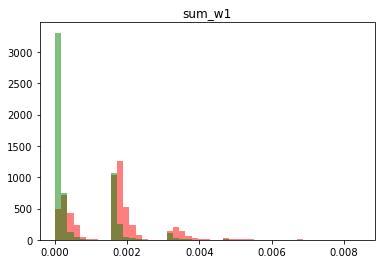

max_tail_match min=0.0 max=48.0


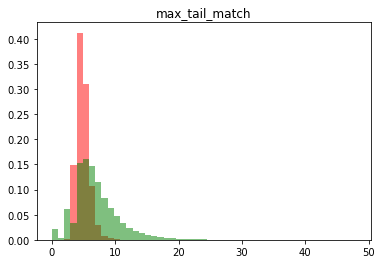

max_lsa_per_sent min=0.0 max=1.34437391329


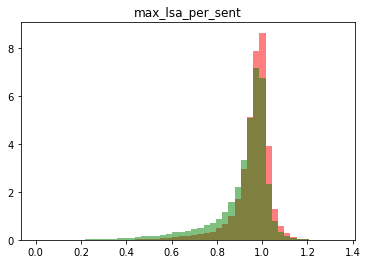

min_lsa_per_sent min=-2.22044604925e-16 max=1.08740386367


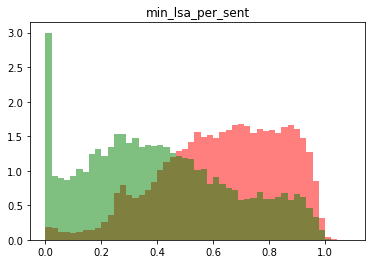

avg_lsa_per_sent min=0.0 max=1.13014800958


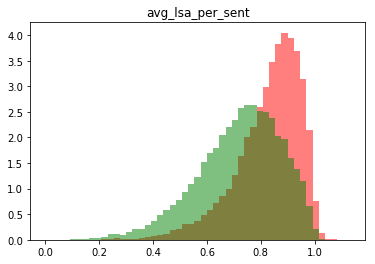

quest_oov_count min=0.0 max=17.0


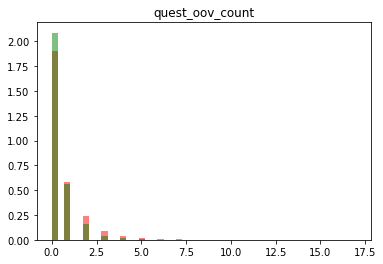

parag_oov_count min=0.0 max=78.0


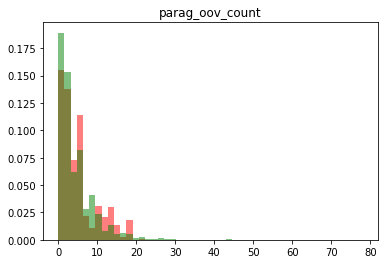

oov_intersection min=0.0 max=17.0


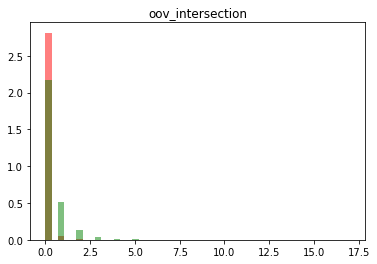

max_intersect3 min=0.0 max=1.0


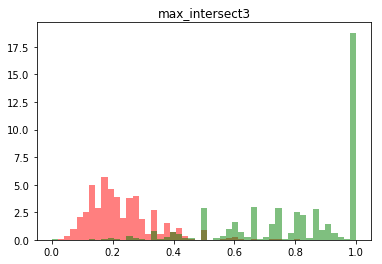

max_syn_sim min=0.378219523823 max=1.0


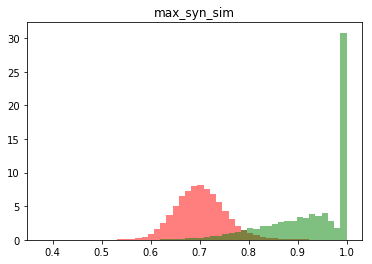

rnn_cos min=-3.44575332711e-08 max=1.40621186804


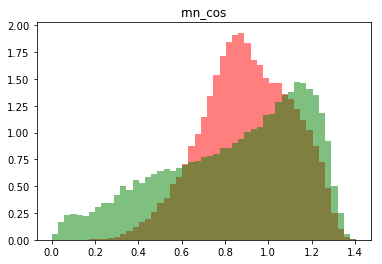

min_wmd min=0.0 max=1.64480330996


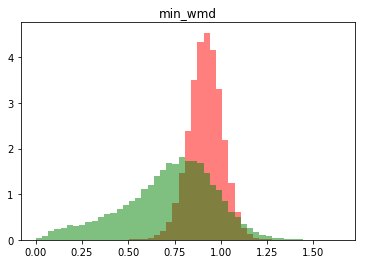

max_wmd min=0.0345053194663 max=4.99643884834


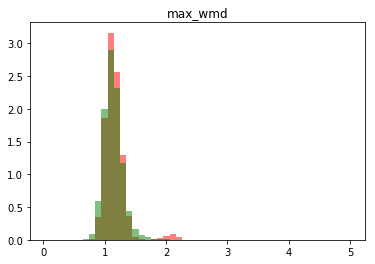

avg_wmd min=0.0345053191213 max=1.83905585675


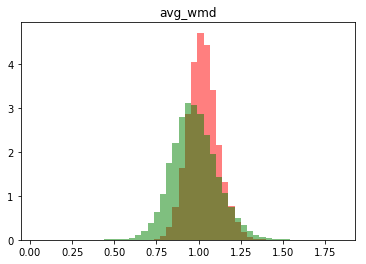

wmd min=0.0345053194663 max=1.82703146535


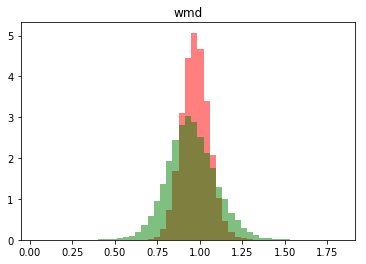

In [11]:
import pylab as plt
import matplotlib.pyplot as plt

nfeat = len(feature_names)
for ifeature,feature_name in enumerate(feature_names):
    fig = plt.figure()
    f0 = df[feature_name][ df['target']==0 ]
    f1 = df[feature_name][ df['target']==1 ]
    
    f_min = df[feature_name].min()
    f_max = df[feature_name].max()
    
    print('{} min={} max={}'.format(feature_name, f_min, f_max))
    
    bins = np.linspace(f_min, f_max, 50)
    plt.hist(f0, bins, alpha=0.5, normed=True, label='target=0', color='red')
    plt.hist(f1, bins, alpha=0.5, normed=True, label='target=1', color='green')
    plt.title(feature_name)
    plt.show()

Попробуем выбрать лучшие фичи с помощью sklearn.feature_selection.SelectKBest

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = StandardScaler().fit_transform(df[feature_names])
y = df['target']

cross_val_score(LogisticRegression(), X, y, scoring='neg_log_loss').mean()


-0.074893161039207637

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2, mutual_info_classif

#x_data_kbest = SelectKBest(f_classif, k=10).fit_transform(X, y)
x_data_kbest = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)
#x_data_kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
cross_val_score(LogisticRegression(), x_data_kbest, y, scoring='neg_log_loss').mean()

-0.081646379293318472

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

pipe = make_pipeline(SelectFromModel(estimator=RandomForestClassifier()),
                     LogisticRegression())

lr = LogisticRegression()
rf = RandomForestClassifier()

X = StandardScaler().fit_transform(df[feature_names])
y = df['target']

print(cross_val_score(lr, X, y, scoring='neg_log_loss').mean())
print(cross_val_score(rf, X, y, scoring='neg_log_loss').mean())
print(cross_val_score(pipe, X, y, scoring='neg_log_loss').mean())

-0.0748931610392
-0.172597016017
-0.0804678452377


In [86]:
df[ df['w2v_cos']==0.0 ][['paragraph','question']]

,paragraph,question
27,О Шопене глубоко скорбел весь музыкальный мир....,Где похоронен Фредерик Шопена?
55,Неспецифические защитные механизмы являются эв...,Какой процесс является важным неспецифическим ...
92,Как и во всякой другой сфере интеллектуальной ...,Что собой представляет управление?
93,Конкурентная разведка (англ. Competitive Intel...,Чьей прерогативой являются методов оперативно-...
116,Законодательный орган — Ландтаг Баден-Вюртембе...,Как называется орган конституционного надзора ...
135,Оперу ждали с огромным нетерпением. 7 августа ...,Какой показалась опера?
136,В 1956 он женился на американской писательнице...,Как звали приятеля Льюиса Клайва Стейплза?
145,Применение гомоплазии в морфологических набора...,Что является важным элементом кладистического ...
179,"В 496, на 15-м году правления Хлодвига разрази...",Как звали короля франков?
201,В музее накоплены и изучаются материалы по ист...,Культуру какого субэтноса подробно освещает му...
